# Manufactures, Structural Transformation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from enclose import *
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Introduction

This extends the model of land enclosures to include a non-agricultural "manufacturing" sector in order to study structural transformation questions.

## A model of enclosures

As before, there is an economy-wide labor force that inelastically supplies labor $\bar L$ to the economy. The total supply of land is $\bar T$, with $T_e$ denoting enclosed land.  $t_e=\frac{T_e}{\bar T}$ is the share of land enclosed.

Laborers can now move between manufacturing and agriculture, and within agriculture between the unenclosed and enclosed sectors. In equilibrium, labor moves until the competitive market wage $w$ it can earn in the "enclosed production" and/or in the manufacturing sectors is also equal to the value average product of (local wage plus land rents) the same labor could earn in the unenclosed sector.

Production on enclosed and unenclosed production sites employs land $T$ and labor $L$ with the following homogenous of degree 1 Cobb-Douglas production technologies:

|                                    |                   |
|:-----------------------------------|:------------------| 
| $p \cdot \theta_M \cdot G(K,L)= {K}^{1-\beta}\cdot L^\beta$  |  Manufacturing sector |     
| $F(T,L)= {T}^{1-\alpha}\cdot L^\alpha$  |  Unenclosed agriculture sector |
| $\theta \cdot F(T,L)$  |  Enclosed agriculture sector|

Labor moves between manufacturing and agriculture, and within the agricultural sector:

$$
L_e + L_u = 1 - L_m
$$

or

$$
l_e + l_u = 1 - l_m
$$

Production in the manufacturing sector can be expressed in terms of potential sector output: 

$$
p \cdot \theta_M \cdot l_m^\beta \cdot G(\bar K, \bar L)
$$

because $L_M = l_m \bar L$ and $K_m$. The value marginal products of labor (MPL_i) in sector $i \in \{m, e, u\}$ can then be written:

$$
MPL_m = 
\beta \cdot \left ( \frac{1}{l_m} \right ) ^{1-\beta} \cdot  \bar k^{1-\beta}
$$

$$
MPL_e = 
 \alpha \cdot \theta \cdot \left ( \frac{t_e}{l_e} \right ) ^{1-\alpha} \cdot \bar t^{1-\alpha}
$$


The value Average product of labor in unenclosed agriculture as:
$$
\begin{aligned}
APL_u &= \frac{F(t_u, l_u)}{l_e} \cdot \frac{F(\bar T, \bar L)}{\bar L} \\
   &=  \left ( \frac{1-t_e}{1-l_m-l_e} \right ) ^{1-\alpha} \cdot  \bar t^{1-\alpha}
\end{aligned}
$$

**Labor allocations as a function of the enclosure rate $t_e$** 

Suppose share $t_e$ of agricultural land has been enclosed. Workers will move across sectors (from agriculture to manufacturing) or from the enclosed to the unenclosed agricultural sectors until:

$$
w = p \cdot MPL_m = MPL_e = APL_u
$$

Focusing on the last equality first, and simplifying:

$$
(\alpha \theta)^\frac{1}{1-\alpha} \left ( \frac{t_e}{l_e}   \right ) 
= \left ( \frac{1-t_e}{(1-l_m)-l_e} \right )  
$$

and solving for labor allocations as a function of $t_e$:

$$
l_e^*(t_e) = \frac{\Lambda t_e }{(1-t_e+\Lambda t_e)} \cdot (1-l_m)
$$

where  $\Lambda = (\alpha \theta )^{\frac{1}{1-\alpha}}$ 

These expressions are just like what we derived for the agriculture-only economy except that now $(1-l_m)$ replaces $1$.

With this expression for $l_e^*(t_e)$ we can find an expression for the agricultural 'wage' as a function of $t_e$ and $l_m$

$$
\begin{aligned}
w(t_e)^* &=  \bar t^ {1-\alpha} \cdot \left ( \frac{t_e}{l_e(t_e)^*} \right ) ^{1-\alpha}  \\
 &=  \bar t^ {1-\alpha} \cdot (1-t_e+\Lambda t_e) ^{1-\alpha} \cdot \left (\frac{1}{1-l_m} \right )^{1-\alpha}  
\end{aligned}
$$



Labor will move across sectors in search of the highest wage.  An equilibrium is reached when the  labor share to manufacturing $l_m$ equalizes returns to workers across sectors:

$$
p \cdot \beta \bar k ^{1-\beta} \left (\frac{1}{l_m}   \right )^{1-\beta}  
= \bar t^ {1-\alpha} \cdot  (1-t_e+\Lambda t_e) ^{1-\alpha}  \cdot \left (\frac{1}{1-l_m} \right )^{1-\alpha}
$$

The right hand side represents a weighted average of the demand for labor in the enclosed or unenclosed sector.  We can think of the mode as an augmented specific factors model with mobile labor, capital specific to the manufacturing sector, and land specific to agriculture. The twist to the model is that land may be enclosed or unenclosed, which can affect agricultural labor demands and hence also labor supply to the manufacturing sector. 

The above equilibrium condition will in general lead to a unique equilibrium in $l_m$ since there is dimininishing marginal productivity of labor.

Except for the special case where $\alpha = \beta$ there will be no clean closed form solution, but graphical and numerical analysis is straightforward. 


## Graphical analysis

The `weq` function takes labor supply as an input.  Without manufacturing, it's $\bar t = \frac{\bar T}{\bar L}$


### Python functions
Labor demand in manufacturing 

`mplm(lm, p=1, kb=1, b=0.5)`:


$$
p_m \cdot \beta \cdot \left ( \frac{1}{l_m} \right ) ^{1-\beta} \cdot  \bar k^{1-\beta}
$$

In [3]:
def mplm(lm, p, kb, b ):
    C = (p*b) * kb**(1-b)
    return C * (1/lm)**(1-b)

Demand for labor in agriculture (in private economy):

`mpla(lm, te, tb = 1, a =0.5, th=1):`

$$

$$
 But substitute in:
$$
l_e^*(t_e) = \frac{\Lambda t_e }{(1-t_e+\Lambda t_e)} \cdot (1-l_m)
$$


In [4]:
def mpla(lm, te, tb = 1, a=0.5, th=1, mu=1):
    """labor demand in agriculture; 
    mu = 0  full tragedy private
    mu = 1  planner"""
    lam = Lambda(th, a, mu)
    C = tb**(1-a) *  (1 + (lam-1)*te)**(1-a) 
    return C * (1/(1-lm))**(1-a)

#### Numerically find $l_m$ for any $t_e$ and other parameters

Labor will move across sectors in search of the highest wage.  An equilibrium is reached when the  labor share to manufacturing $l_m$ equalizes returns to workers across sectors:

$$
p \cdot \beta \bar k ^{1-\beta} \left (\frac{1}{l_m}   \right )^{1-\beta}  
= \bar t^ {1-\alpha} \cdot  (1-t_e+\Lambda t_e) ^{1-\alpha}  \cdot \left (\frac{1}{1-l_m} \right )^{1-\alpha}
$$


In [5]:

def LM(te, b, a, th, tb, kb, p, mu):
    '''Solve for private or social labor share 
    to manufacturing.  When:
       mu = 0   APL = MPL
       mu = 1   MPL = MPL '''
    
    def f(m):
        return mplm(m, p, kb, b)-mpla(m, te, tb, a, th, mu)
    
    lmp = fsolve(f,[0.01, 0.99])[1]
    return lmp

In [6]:
LM(te = 1, b=0.5, a=0.5, th=1,  tb=1, kb=1, p=1, mu = 1)

0.19999999999641296

In [7]:
interact(LM, te=(0,1,0.05), b=(0.2,0.8,0.05), a=(0.2,0.8,0.05), th=(0.9,3,0.1), tb=(0.5,5,0.1), kb=(0.5,5,0.1), p=(0.5,3,0.1), mu=(0,1,0.5));

interactive(children=(FloatSlider(value=0.0, description='te', max=1.0, step=0.05), FloatSlider(value=0.45, de…

In [8]:
def pl(te, th=1, p=1, kb= 1,  a=0.5, b=0.5, tb=1, mu =0):
    '''Plot '''
    lm = np.linspace(0,1,100)
    plt.plot(lm, mplm(lm, p, kb, b))
    plt.plot(lm, mpla(lm, te, tb, a, th, mu))
    plt.grid()
    plt.xlim(0,1)
    plt.ylim(0,2)
    
    lmp = LM(te, b, a, th,  tb, kb, p, mu = 0)
    wmp = mpla(lmp, te, tb, a, th, mu = 0)
    
    lme = LM(te, b, a, th, tb, kb, p, mu=1)
    wme = mpla(lme, te, tb, a, th, mu=1)
    
    print(f'lme = {lme: 0.2f}, wme = {wme:0.2f}')
    plt.scatter(lmp, wmp)
    plt.scatter(lmp, 0)
    plt.vlines(lmp, 0, wmp)
    
    
    plt.scatter(lme, wme)
    plt.scatter(lme, 0)
    plt.vlines(lme, 0, wme)
    plt.xlabel('$t_e$')

lme =  0.20, wme = 1.14


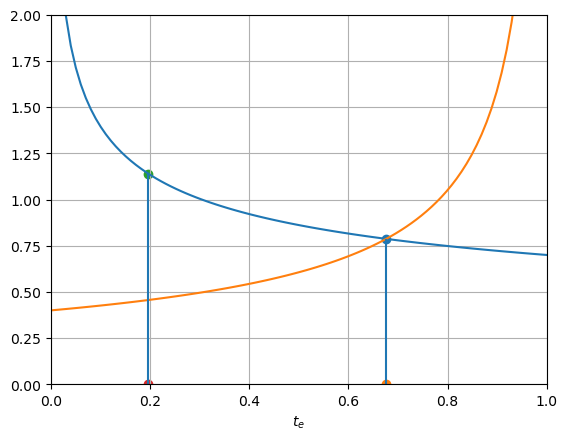

In [9]:
pl(te=1, th=1, p=1, kb= 1,  a=0.4, b=0.7, tb=1, mu =0)

## The effect of enclosure on structural transformation

Thus far we have only set things up to find the equilibrium level of manufacturing employment $l_m$, conditional on an arbitrary initial enclosure rate $t_e$.  We must still work out how to derive the equilibrium level $t_e$ which will depend on the cost of enclosures and how decentralized enclosure games are played out.  We will get to that in the next section.  

But first, it is interesting to explore graphically how the enclosure rate $t_e$ can have an important influence on the level of structural transformation. 

Conider first an an economy without any enclosure, so $t_e=0$. For the parameter values shown below, only about 20 percent of the population moves into manufacturing.

lme =  0.21, wme = 1.12


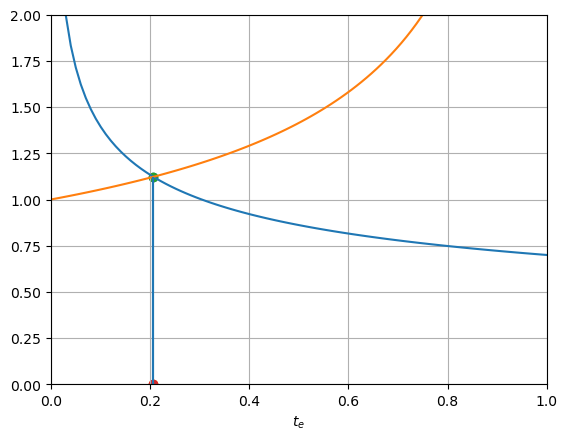

In [10]:
pl(te=0, th=1, p=1, kb= 1,  a=0.5, b=0.7, tb=1)

Now consider the same economy, but with complete land enclosure, so $t_e=1$.  Notice that in this economy $\theta=1$ so enclosure does not raise plot level TFP.

For these parameter values the labor share in manufacturing rises dramatically from 20 percent to almost 70 percent, but we end up with a significantly lower equilibrium wage (the Weitzman/Samuelson effect).



lme =  0.20, wme = 1.14


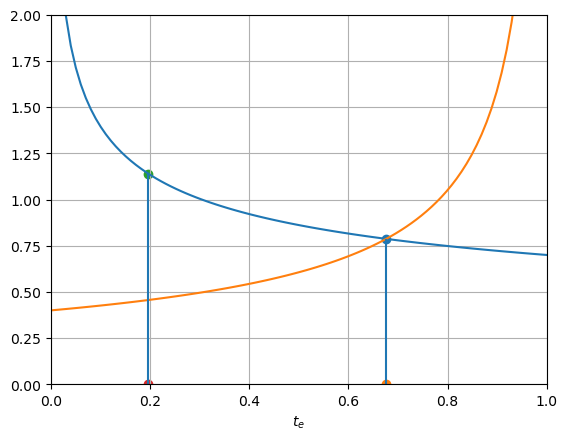

In [11]:
pl(te=1, th=1, p=1, kb= 1,  a=0.4, b=0.7, tb=1)

Below the same diagram with interactive sliders to change parameters:

In [12]:
interact(pl, te=(0,1,0.1), th=(0.9, 3,0.1), p = (0.5,2,0.1), tb=(0.5,2,0.1), mu=(0,1,0.1));

interactive(children=(FloatSlider(value=0.0, description='te', max=1.0), FloatSlider(value=1.0, description='t…

We have not yet specified a cost to enclosure. If enclosure were costless, and $\theta \ge 1$ then it would always be worthwhile to enclose. If enclosure is costly we need to compare social benefits to social costs.

## Socially optimal enclosure with manufacturing

The planner wants to choose $(T_e, L_e, L_m)$ to maximize:


$$
\theta F(T_e, L_e) +  F(\bar T - T_e, \bar L - L_m - L_e)  + p \cdot G(\bar K, L_m) - c \cdot T_e
$$




In intensive form:

$$
\max_{t_e} \ \ \left[\theta\cdot F(t_e, l_e(t_{e}))+F(1-t_e, 1-l_m(t_e)-l_e(t_{e}))\right]\cdot F(\bar T, \bar L)  
+ p \cdot l_m(t_e)^{1-\alpha} \cdot G(\bar K,  \bar L ) - c \cdot \bar T \cdot t_e
$$

The planner will want to equate marginal value products across sector, so that 

$$
p \cdot MPL_m = MPL_e = MPL_u
$$

(this is slighlty different from the private eqn above ).

Focusing on the first equality, and simplifying:

$$
\Lambda_o \frac{t_e}{l_e}   
= \left ( \frac{1-t_e}{(1-l_m)-l_e} \right )  
$$

and solving for labor allocations as a function of $t_e$:

$$
l_e^*(t_e) = \frac{\Lambda_o t_e }{(1-t_e+\Lambda_o t_e)} \cdot (1-l_m)
$$

where $\Lambda_o = \theta^\frac{1}{1-\alpha}$


The value marginal product in the 'enclosed' sector can then be written


$$
\bar t^ {1-\alpha} \cdot \left ( \frac{t_e}{l_e(t_e)^*} \right ) ^{1-\alpha}  
=  \bar t^ {1-\alpha} \cdot (1-t_e+\Lambda_o t_e) ^{1-\alpha} \cdot \left (\frac{1}{1-l_m} \right )^{1-\alpha}  
$$



For this to also equal the value marginal product of labor in manufacturing the social planner will make sure that $l_m$ is chosen so that:

$$
p \cdot \beta \bar k ^{1-\beta} \left (\frac{1}{l_m}   \right )^{1-\beta}  
= \bar t^ {1-\alpha} \cdot  (1-t_e+\Lambda_o t_e) ^{1-\alpha}  \cdot \left (\frac{1}{1-l_m} \right )^{1-\alpha}
$$

This looks similar to the condition that emerges from a private economy, except that the planner equalizes marginal value products in agriculture, whereas the private economy equalizes the value marginal product in the enclosed sector to the value average product in the unenclosed sector. 